# Problem Statement

Avocado is a fruit consumed by people heavily in the United States.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


The task is to make a mode that can consider the data provided and predict the Average Price.

**Output Variable :** Average Price

**Problem Type :** Regression Problem

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
ds=pd.read_csv('avocado.csv')
df=pd.DataFrame(ds)
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0         0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1         1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2         2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3         3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4         4.0  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

     year  region  
0  2015.0  Albany  
1  2015.0  Albany  
2  2015.0  Albany  
3  2015.0  Albany  
4  2015.0  Albany

In [3]:
df.shape

(16468, 14)

Our dataset has 16468 rows and 14 columns right now.

In [4]:
pip install pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=677cbc6328c489c236ca5d617a93db571a1843d4eee1afde12b8009341f3355e
  Stored in directory: c:\users\ankitbh\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107420 sha256=c099f35e8727c1a5a160ba329479b4d6983313712bbfdffe9a140ba1baea6656
  Stored in directory: c:\users\ankitbh\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
Successfully built htmlmin phik
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas_profiling

In [6]:
pandas_profiling.ProfileReport(df)

This is a quicker way for EDA or data insights about the dataset. However, we will be performing EDA manually as well.

From above report, we get to know that:
- There are total 14 variables and 16468 observations in our dataset.
- More than 90% data is duplicate.
- More than 90% cells have missing data.
- The last rows have missing data, so we need to check for the rows with no data and have to remove those rows.

# Checking Missing Values

In [7]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

We can see that there is large count for missing data. We need to check for this.

Lets plot a heatmap for the same.

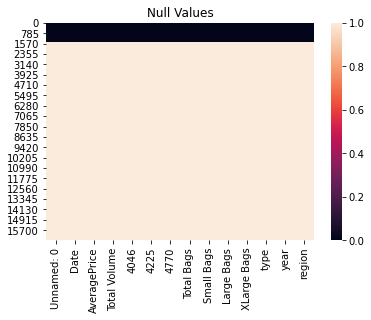

In [8]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

This indicates that very few no of rows have data. Rest all rows are blank. So we will be removing null values.

In [11]:
is_NaN = df. isnull()
row_has_NaN = is_NaN. all(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

       Unnamed: 0 Date  AveragePrice  Total Volume  4046  4225  4770  \
1517          NaN  NaN           NaN           NaN   NaN   NaN   NaN   
1518          NaN  NaN           NaN           NaN   NaN   NaN   NaN   
1519          NaN  NaN           NaN           NaN   NaN   NaN   NaN   
1520          NaN  NaN           NaN           NaN   NaN   NaN   NaN   
1521          NaN  NaN           NaN           NaN   NaN   NaN   NaN   
...           ...  ...           ...           ...   ...   ...   ...   
16463         NaN  NaN           NaN           NaN   NaN   NaN   NaN   
16464         NaN  NaN           NaN           NaN   NaN   NaN   NaN   
16465         NaN  NaN           NaN           NaN   NaN   NaN   NaN   
16466         NaN  NaN           NaN           NaN   NaN   NaN   NaN   
16467         NaN  NaN           NaN           NaN   NaN   NaN   NaN   

       Total Bags  Small Bags  Large Bags  XLarge Bags type  year region  
1517          NaN         NaN         NaN          NaN  NaN 

We can see that 14951 rows have null values. So only 16468-14951= 1517 rows are relevant rows and rest can be dropped.

In [14]:
df=df.dropna(how='all')

In [15]:
df.shape

(1517, 14)

So now we are left with 1517 rows. Lets check the null values now.

In [17]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no other null values left, so we are good to go.

# Analysis of Data

In [20]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  1517.000000   1517.000000  1.517000e+03  1.517000e+03  1.517000e+03   
mean     26.995386      1.074990  1.601879e+06  6.464387e+05  6.114375e+05   
std      14.848287      0.188891  4.433143e+06  1.947614e+06  1.672906e+06   
min       0.000000      0.490000  3.875074e+04  4.677200e+02  1.783770e+03   
25%      14.000000      0.980000  1.474700e+05  2.040034e+04  4.147606e+04   
50%      29.000000      1.080000  4.027919e+05  8.175117e+04  1.186649e+05   
75%      39.000000      1.190000  9.819751e+05  3.775785e+05  4.851503e+05   
max      51.000000      1.680000  4.465546e+07  1.893304e+07  1.895648e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.517000e+03  1.517000e+03  1.517000e+03  1.517000e+03    1517.000000   
mean   5.040550e+04  2.935974e+05  2.487736e+05  4.264205e+04    2181.771074   
std    1.377812e+05  7.579765e+05  6.474765e+05  1.182157e+05    7455.712144   
min    0.000000e+00  3.311770e+03  3.311770e+03  0.000000e+00       0.000000   
25%    9.112500e+02  3.620689e+04  2.972722e+04  5.407400e+02       0.000000   
50%    7.688170e+03  7.397906e+04  6.237569e+04  5.044350e+03       0.000000   
75%    2.916730e+04  1.576097e+05  1.461994e+05  2.926767e+04     401.480000   
max    1.381516e+06  6.736304e+06  5.893642e+06  1.121076e+06  108072.790000   

              year  
count  1517.000000  
mean   2015.162821  
std       0.369324  
min    2015.000000  
25%    2015.000000  
50%    2015.000000  
75%    2015.000000  
max    2016.000000

In [22]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

There are three categorical data columns i.e. Date, type and region. We will convert these variables into numeric format.

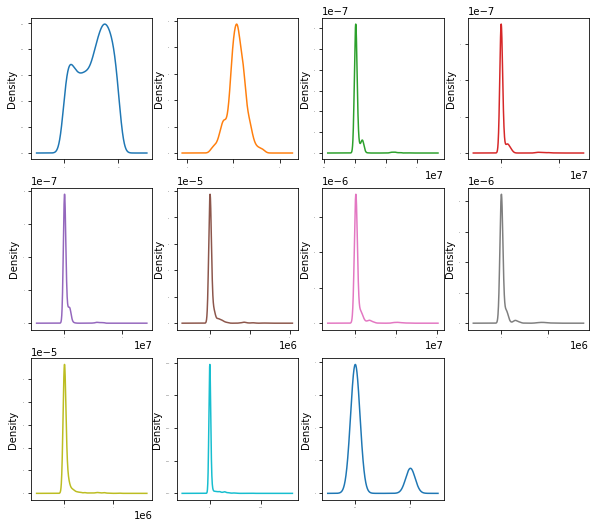

In [23]:
df.plot(kind='density',subplots=True,layout=(4,4),sharex=False, legend=False, fontsize=1,figsize=(10,12))
plt.show()

We can see that there is skewness in most of the columns.
Data is either left skewed or right skewed.

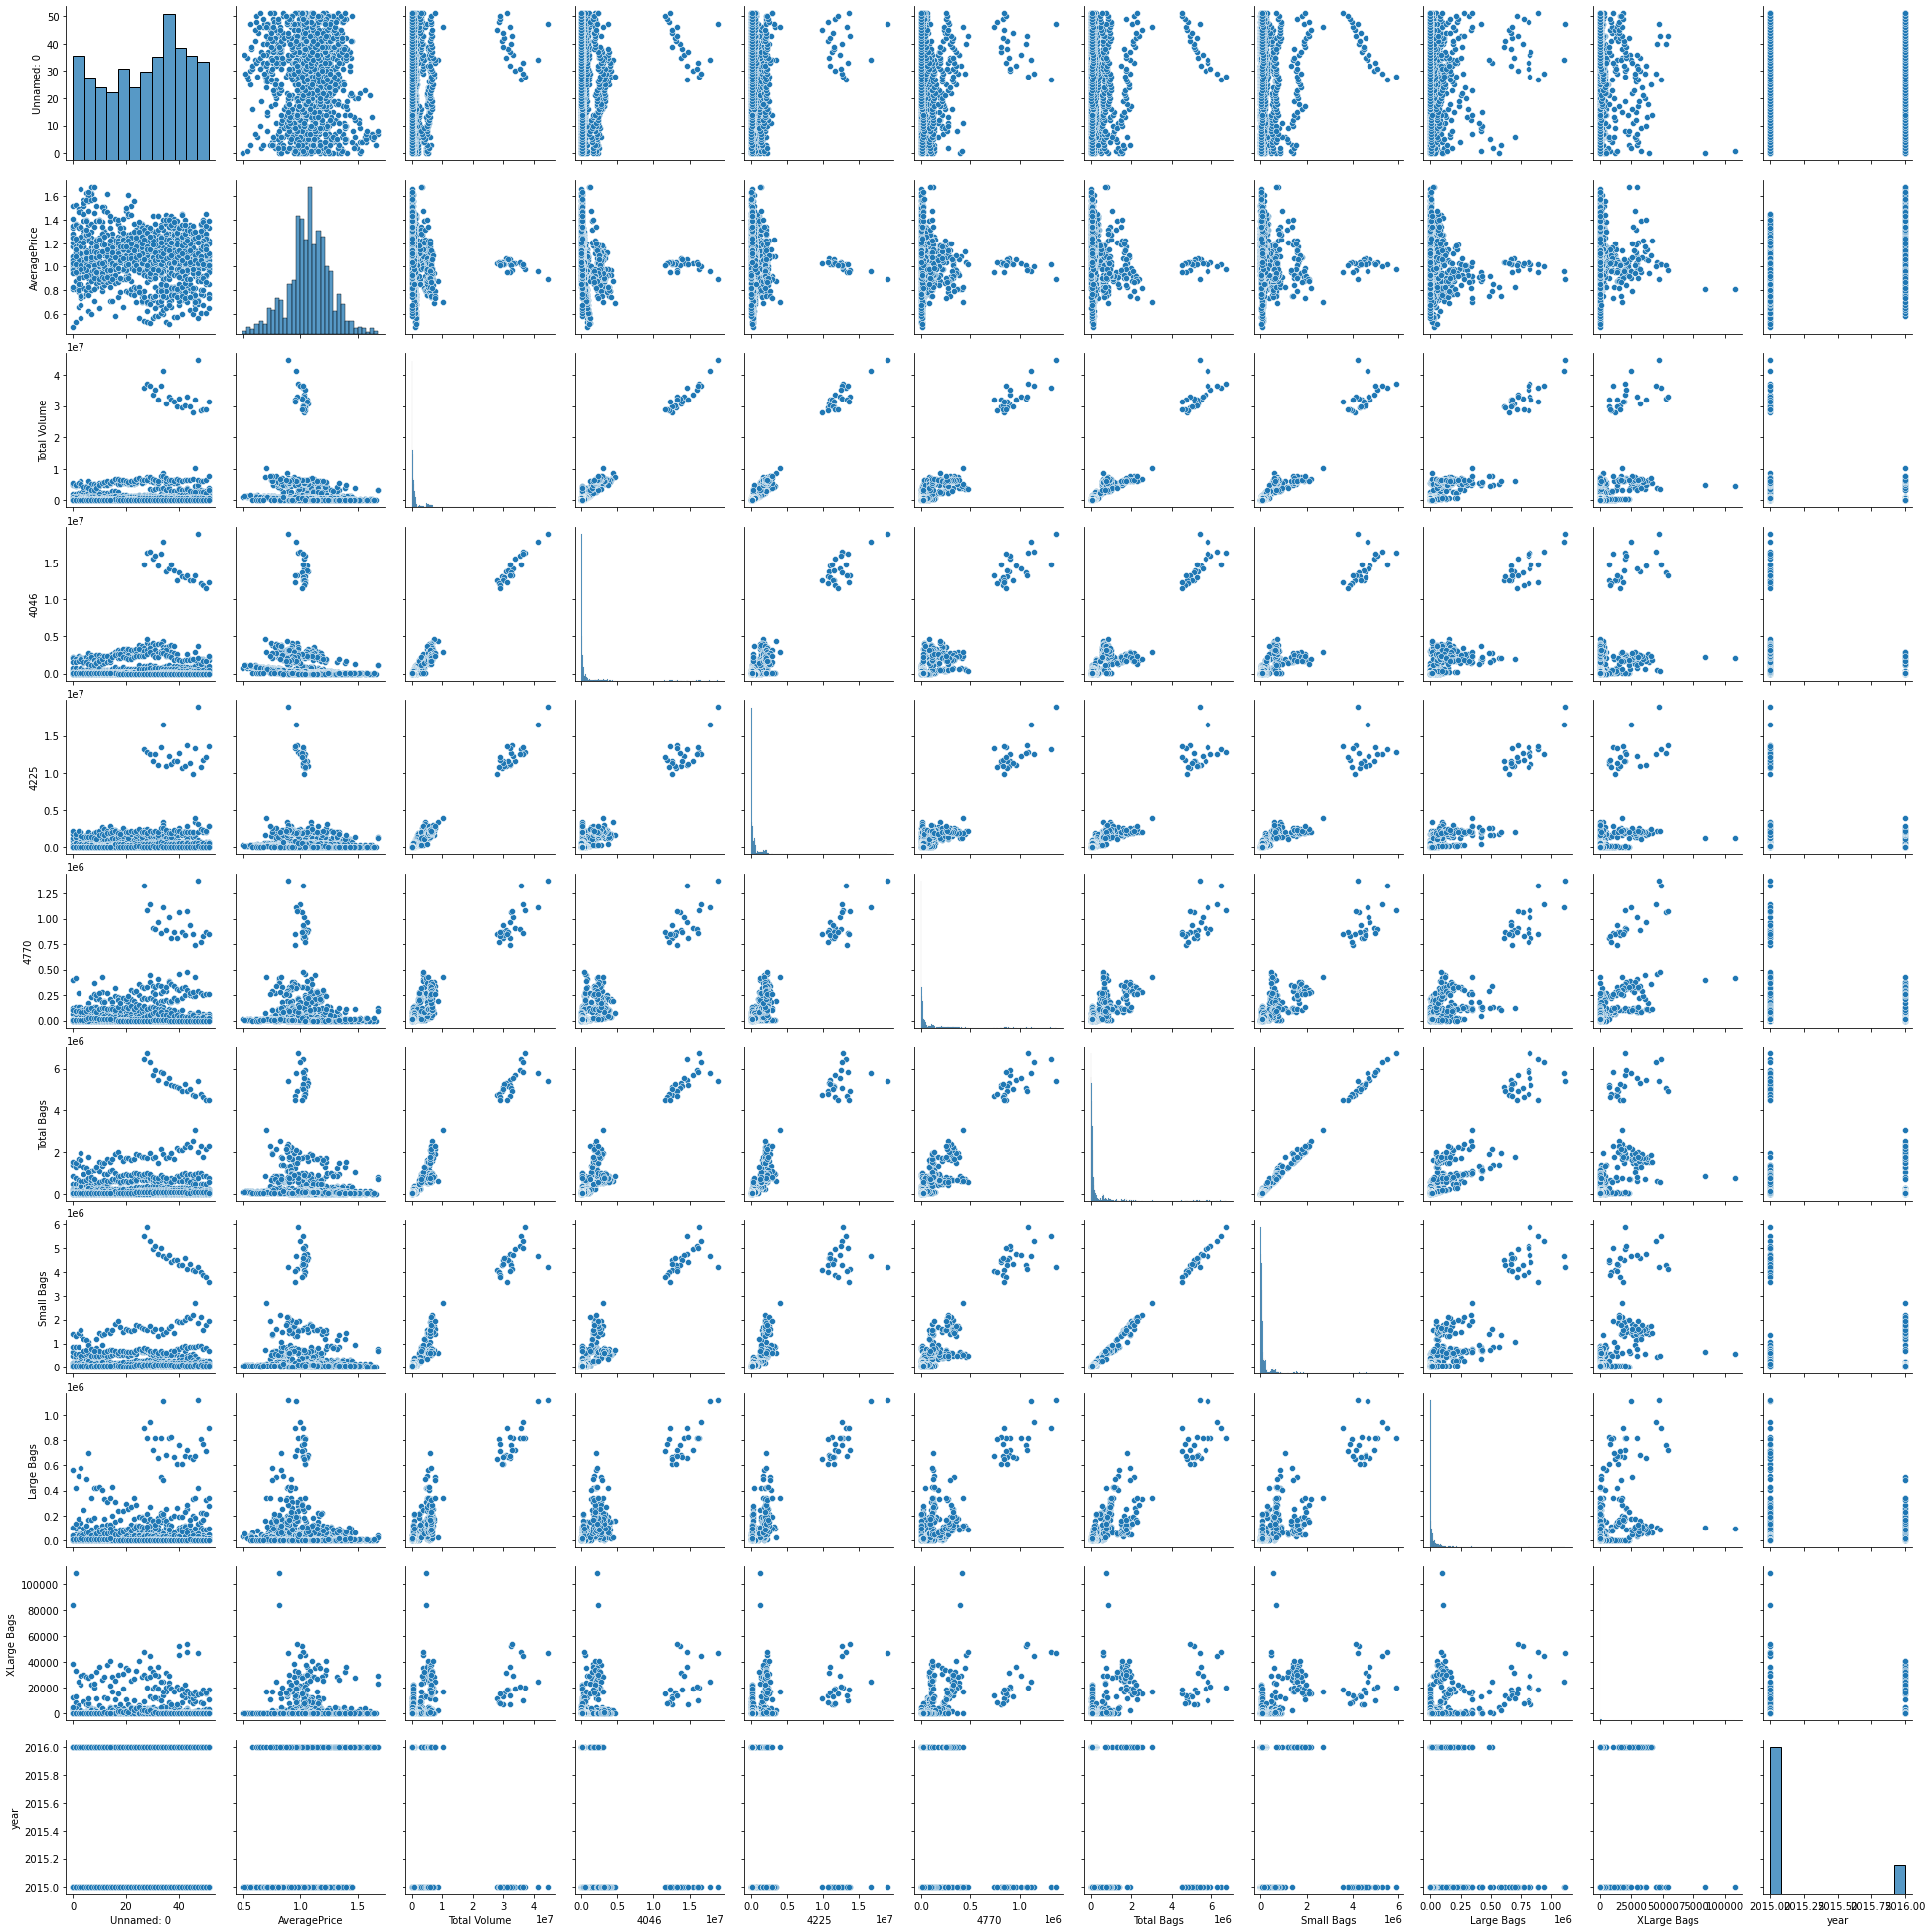

In [26]:
sns.pairplot(df)

## Label Encoding 

In [31]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [33]:
df['type'].unique()

array(['conventional'], dtype=object)

The column 'type' contains only one value 'conventional', so it does not have any impact on the target variable. So we can remove this variable.

In [34]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [37]:
df=df.drop(['Unnamed: 0','type'], axis=1)

In [38]:
df.shape

(1517, 12)

In [39]:
df['Date'] =df['Date'].astype('datetime64[ns]')

Lets use Label Encoding to convert region into numerical format.

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

## Checking Correlation

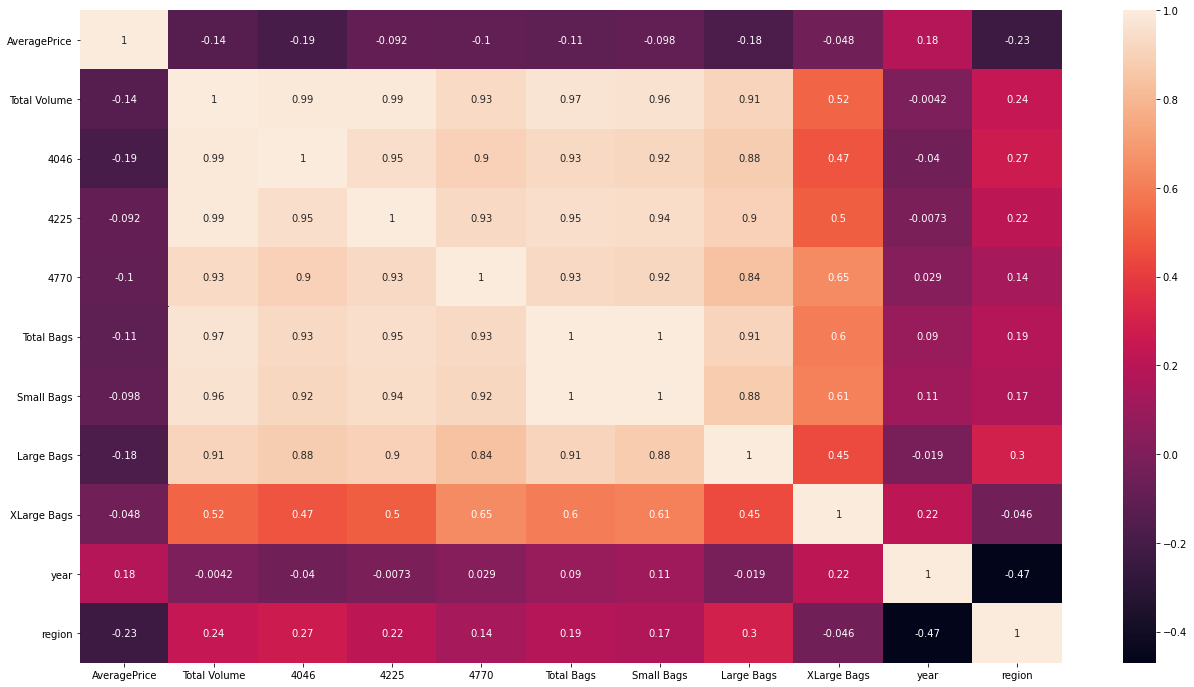

In [43]:
corr_mat=df.corr()
plt.figure(figsize=(22,12))
sns.heatmap(corr_mat,annot=True)
plt.show()

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. So we can carry on with all features.

In [46]:
corr_matrix=df.corr()
corr_matrix['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
year            0.178683
XLarge Bags    -0.048284
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
region         -0.229408
Name: AveragePrice, dtype: float64

The variable region is the most closely related to the target variable while the variable XLarge Bags is least closely related with the target variable.

## Checking Outliers

<AxesSubplot:>

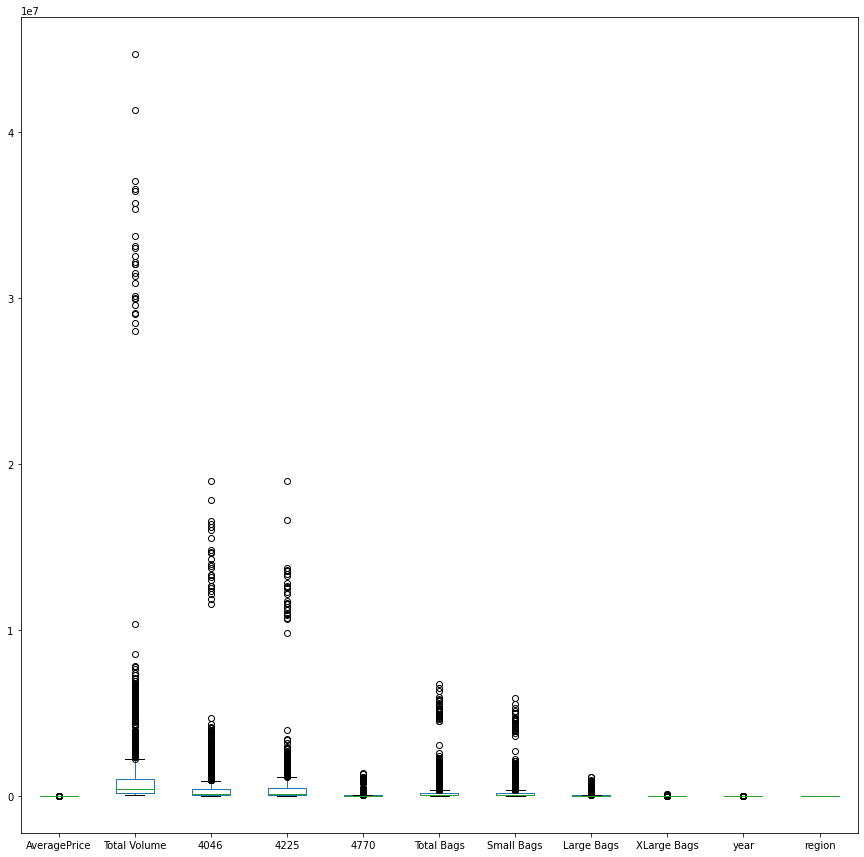

In [63]:
df.plot(kind='box',layout=(6,3), figsize=(15,15),widths=0.5)

<AxesSubplot:xlabel='region'>

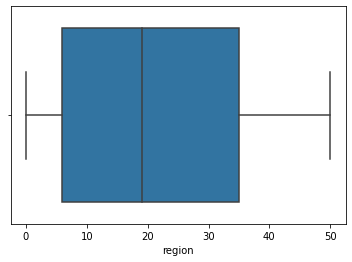

In [50]:
sns.boxplot(df['region'])

<AxesSubplot:xlabel='4046'>

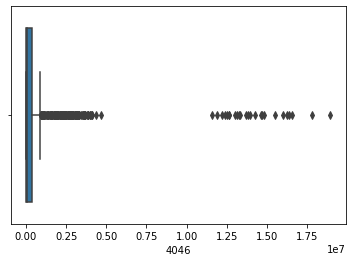

In [52]:
sns.boxplot(df['4046'])

We can see that there are outliers in many columns of the dataset. But before removing any outlier, we will calculate the zscore and then will remove if its z score value is greater than 3.

In [55]:
df_new=df.drop('Date',axis=1)
from scipy.stats import zscore
z=np.abs(zscore(df_new))

In [56]:
z

array([[1.35048079, 0.34696593, 0.33149016, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       [1.45639674, 0.34907791, 0.33167633, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       [0.76783831, 0.33478463, 0.33161448, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       ...,
       [2.14485045, 0.32120275, 0.30820887, ..., 0.1820374 , 2.26753179,
        0.88028586],
       [2.09189247, 0.31878364, 0.30423037, ..., 0.29272731, 2.26753179,
        0.88028586],
       [1.88006056, 0.3201721 , 0.30987728, ..., 0.29272731, 2.26753179,
        0.88028586]])

In [57]:
df_new[(z>3).all(axis=1)]

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, year, region]
Index: []

There are no value having z score value greater than 3, so we can skip removing outliers.

## Removing Skewness

- Skewness indicates the asymmetry in the probability distribution in our dataset.
- Skewness exists when the distribution curve is distorted or asymmetrical, meaning that there are more data points on one side of the median than on the other.
- Many models do not work well if there is skewness as the tall tail acts as outliers in this case.

In [58]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [67]:
x.skew()

Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

The skewness is very high in almost all the columns. We need to remove the skewness so that the model can have good performance.

In [65]:
x_new=x.drop('Date',axis=1)
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson', standardize=False)
x_trans=pt.fit_transform(x_new)

In [70]:
x_trans=pd.DataFrame(x_trans,columns=x_new.columns)

In [71]:
x_trans.skew()

Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
year            0.000000
region         -0.209568
dtype: float64

We have now reduced the skewness to a great extend.

In [72]:
for i in x_trans.columns:
    df[i]=x_trans[i]

In [73]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
year            0.000000
region         -0.209568
dtype: float64

We have now moved the same changes in our original dataframe.

## Feature Engineering

In [87]:
df1 = df.copy()

#Introducing new feature = 'season'


df1['Date'] = pd.to_datetime(df1['Date'])
df1['month'] = df1['Date'].dt.month

cnd = [(df1['month'].between(3,5,inclusive=True)),
           (df1['month'].between(6,8,inclusive=True)),
           (df1['month'].between(9,11,inclusive=True)),
           (df1['month'].between(12,2,inclusive=True))]

val = [0,1,2,3]
#spring = 0, summer = 1, fall = 2, winter = 3
df1['seasons'] = np.select(cnd, val)

In [91]:
df=df1

In [99]:
df=df.drop('Date',axis=1)

In [100]:
df.shape

(1517, 13)

In [101]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [102]:
x

Total Volume       4046      4225       4770  Total Bags  Small Bags  \
0         0.132857   7.697140  8.750491   4.400116    4.638710    4.387382   
1         0.132857   7.174405  8.624196   4.640317    4.657750    4.403898   
2         0.132857   7.373269  9.184111   5.688278    4.624497    4.374732   
3         0.132857   7.804793  8.925975   4.918719    4.548694    4.306877   
4         0.132857   7.579430  8.612647   4.974215    4.562978    4.317484   
...            ...        ...       ...        ...         ...         ...   
1512      0.132857  12.911711  8.772308  13.387692    4.992718    4.663931   
1513      0.132857  12.523140  8.723582  13.574567    5.002534    4.679127   
1514      0.132857  12.615748  8.732071  13.303293    5.000360    4.675762   
1515      0.132857  12.827490  8.740400  13.383911    5.004063    4.681399   
1516      0.132857  12.516526  8.747445  13.284425    5.015967    4.685588   

      Large Bags  XLarge Bags      year    region  month  seasons  
0       5.932002    -0.000000  0.132857  0.000000     12        0  
1       6.005505    -0.000000  0.132857  0.000000     12        0  
2       6.099204    -0.000000  0.132857  0.000000     12        0  
3       6.539883    -0.000000  0.132857  0.000000      6        1  
4       7.228209    -0.000000  0.132857  0.000000     11        2  
...          ...          ...       ...       ...    ...      ...  
1512   16.245722     3.349922  0.132857  3.366734     10        2  
1513   15.725643    -0.000000  0.132857  3.366734      9        2  
1514   15.614815     3.719682  0.132857  3.366734      2        0  
1515   15.621509    -0.000000  0.132857  3.366734      9        2  
1516   16.580438    -0.000000  0.132857  3.366734      9        2  

[1517 rows x 12 columns]

## Finding the best random state

In [103]:
#Finding best random_state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=LR.score(x_train,y_train)
    acc=acc*100
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  36.60574292079377 on random state  4


In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=31)

from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

model_reg = [RandomForestRegressor(), SVR(), DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(normalize=True),Ridge(alpha=0.05,normalize=True)]
df_result=pd.DataFrame(columns=['Model','Score','Mean Absolute Error','RMSE','R2 Score'])


for model in model_reg:
    m = model
    test_string=str(m)
    spl_word='('
    print('Model: ',m)
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    acc=m.score(x_train,y_train)
    acc_final=acc
    print('Score: ', acc_final)
    rmse = np.mean(np.sqrt(-cross_val_score(model, x_test, y_test, cv=5, scoring="neg_mean_squared_error")))
    r2_scr=r2_score(y_test,pred)
    #scr=cross_val_score(m,x,y,cv=5,scoring)
    #scr=np.sqrt(np.abs(scr['test_score']))
    #scr_final=np.mean(scr)
    #scr_final=scr.mean()
    print('RMSEe: ',rmse)
    #diff=(acc_final-scr_final)
    mean_abs_error=mae(y_test,pred)
    #print('Difference between cross validation score and accuracy is ', diff)
    print('------------------------------------------------')
    df_result=df_result.append({'Model':test_string,'Score':acc_final,'Mean Absolute Error':mean_abs_error,'RMSE':rmse,'R2 Score':r2_scr}, ignore_index=True)

print(df_result)
    

Model:  RandomForestRegressor()
Score:  0.9704090419503275
RMSEe:  0.11480637534142443
------------------------------------------------
Model:  SVR()
Score:  0.5306215659590818
RMSEe:  0.1431807233845745
------------------------------------------------
Model:  DecisionTreeRegressor()
Score:  1.0
RMSEe:  0.15430423339413535
------------------------------------------------
Model:  KNeighborsRegressor()
Score:  0.7302577308841769
RMSEe:  0.13928802729643125
------------------------------------------------
Model:  LinearRegression(normalize=True)
Score:  0.3497817517636769
RMSEe:  0.16278589573236016
------------------------------------------------
Model:  Ridge(alpha=0.05, normalize=True)
Score:  0.32439379009917035
RMSEe:  0.16307340907581191
------------------------------------------------
                               Model     Score  Mean Absolute Error      RMSE  \
0            RandomForestRegressor()  0.970409             0.061669  0.114806   
1                              SVR()  

In [105]:
df_result

Model     Score  Mean Absolute Error      RMSE  \
0            RandomForestRegressor()  0.970409             0.061669  0.114806   
1                              SVR()  0.530622             0.100655  0.143181   
2            DecisionTreeRegressor()  1.000000             0.078728  0.154304   
3              KNeighborsRegressor()  0.730258             0.083513  0.139288   
4   LinearRegression(normalize=True)  0.349782             0.122985  0.162786   
5  Ridge(alpha=0.05, normalize=True)  0.324394             0.123110  0.163073   

   R2 Score  
0  0.792399  
1  0.500295  
2  0.604677  
3  0.631325  
4  0.289619  
5  0.284179

- The best possible value for score in linear regression is 1. We have to choose the model which is more closer to 1.
- Mean Absolute Error indicates the difference between the real value and the predicted value. So it should be minimum.
- Root Mean Squared Error (RMSE) is square root of the variance, which indicates how close observed data points are to the predicted data points. So it should be also minimum for a good fit model.
- R2 score indicates the goodness of fit for a model. So higher the R2 score of the model, better the performance.

Now, we can see in the above dataframe that Random Forest Regressor is the best fit model for this dataset as it has maximum score and R2 score value (closer to 1) and with least RMSE.

**Final Model**

In [108]:
#Random Forest is our best fit model.
rf = RandomForestRegressor()
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9708654101787811

In [109]:
y_pred = rf.predict(x_test)

In [110]:
print("Predicted result: ",y_pred)
print("Actual result : ", y_test)

Predicted result:  [0.9826 1.1418 0.8806 1.1342 1.1685 1.0547 1.1561 1.4875 1.2059 1.0834
 1.0641 1.1417 0.7068 0.7522 1.1116 1.0245 0.9662 1.1132 0.7512 1.044
 1.0923 1.3081 1.3299 1.4213 1.2993 1.1093 0.9873 1.0516 1.0474 1.1232
 0.7398 0.8917 0.9092 1.052  1.2032 1.0497 0.9601 1.092  1.1024 1.1182
 1.0502 0.8799 1.0604 1.1141 1.0757 1.1988 0.973  1.1214 1.1301 0.5436
 1.0172 1.0507 0.948  0.804  1.3399 1.0321 1.046  0.9715 1.1814 1.0367
 1.12   1.0651 1.0322 1.1693 0.8693 1.1257 1.1107 1.1164 1.0907 1.1302
 1.1279 1.0594 1.1046 1.1526 1.0628 1.0646 0.8126 0.9634 1.1282 1.2263
 1.1166 1.1609 1.2331 1.2462 1.0848 1.0868 1.1824 0.7878 1.2756 1.1634
 1.1331 1.1553 1.0111 0.8628 0.8577 1.0998 1.034  1.2153 0.7888 1.1108
 1.1677 1.1904 1.1337 1.0336 0.9398 1.208  0.746  1.0211 0.5531 1.0569
 1.0569 0.6775 0.857  1.2371 1.1162 1.1525 0.5449 1.1659 0.633  1.0257
 0.5704 1.1426 1.0975 1.0754 0.9979 1.0617 0.973  1.2234 1.0603 1.2179
 1.2395 1.1913 0.83   1.0502 1.0358 1.2462 0.6419 1.1342 1.

In [111]:
#r2 score --> co-efficient of determination' is the proportion of the variance in the dependent variable that is predictable 
#from the independent variable(s). i.e. Change in y when x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test, pred))

0.2841785803385948


# Hyper Parameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
parameters={
 'bootstrap': [True],
 'max_depth': [100,80],
 'max_features': [3,5,20],
 'min_samples_leaf': [3,5],
 'min_samples_split': [10,15,30],
 'n_estimators': [100,300,500]
}

In [114]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [115]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [100, 80],
                         'max_features': [3, 5, 20], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [10, 15, 30],
                         'n_estimators': [100, 300, 500]})

In [116]:
GCV.best_params_ #printing the best parameters found by GridSearchCV

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [117]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [118]:
GCV.score(x_train,y_train)

0.900315368533213

# Saving the model

In [123]:
rf = RandomForestRegressor(bootstrap=True,max_depth=100,max_features= 5,min_samples_leaf=3,min_samples_split=10,n_estimators=100)
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9000793666701901

We have got a final accuracy of 90% which is good.

In [124]:
import joblib
joblib.dump(rf,'Avacado.obj')

['Avacado.obj']